# Experiment with the Bookshelf-Reader-API

In this notebook, we experiment with the book spine segmentation module highly inspired in the [Bookshelf-Reader-API](https://github.com/LakshyaKhatri/Bookshelf-Reader-API) repository.

In [17]:
import math
import os

import cv2
import numpy as np
from PIL import Image

from src.models.image_segmentation import pil_image_to_opencv_image, detect_spines, get_cropped_images

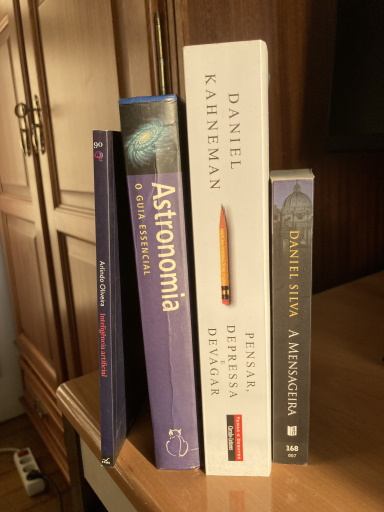

In [4]:
image_path = os.path.join("images", "IMG_1770.jpg")
pil_image = Image.open(image_path)
display(pil_image)

In [6]:
def opencv_image_to_pil_image(opencv_image):
    """
    Converts image from Opencv Image to PIL Image
    """
    opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(opencv_image)

    return pil_image

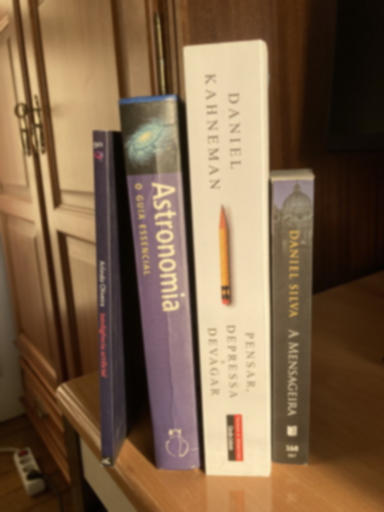

In [7]:
# Breaking down the detect_spines function
img = pil_image_to_opencv_image(pil_image)

height, width, _ = img.shape
    
blur = cv2.GaussianBlur(img, (5, 5), 0)
pil_image_disp = opencv_image_to_pil_image(blur)
display(pil_image_disp)

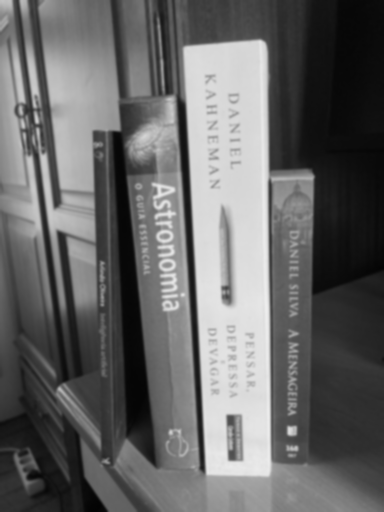

In [8]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)    
pil_image_disp = opencv_image_to_pil_image(gray)
display(pil_image_disp)

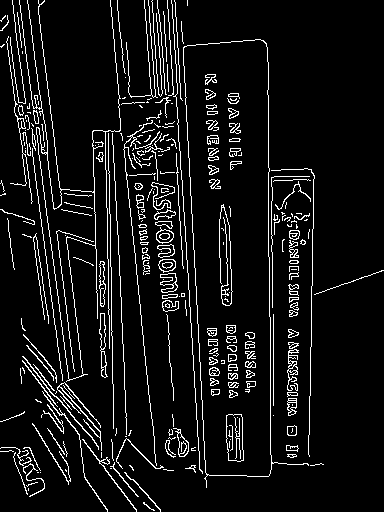

In [10]:
edge = cv2.Canny(gray, 50, 70)
pil_image_disp = opencv_image_to_pil_image(edge)
display(pil_image_disp)

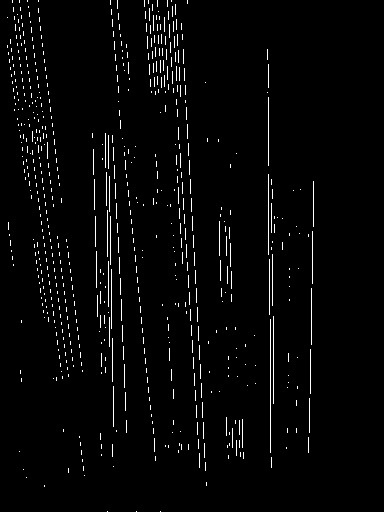

In [11]:
kernel = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=np.uint8)

img_erosion = cv2.erode(edge, kernel, iterations=1)
pil_image_disp = opencv_image_to_pil_image(img_erosion)
display(pil_image_disp)

In [13]:
img = pil_image_to_opencv_image(pil_image)
detect_spines(img)

[((99, 512), (37, 0)),
 ((162, 512), (108, 0)),
 ((132, 512), (105, 0)),
 ((204, 512), (168, 0)),
 ((273, 512), (264, 0)),
 ((307, 512), (316, 0)),
 ((500, 512), (500, 0))]

In [15]:
def resize_img(img):
    img = img.copy()
    img_ht, img_wd, _ = img.shape
    ratio = img_wd / img_ht
    new_width = 500
    new_height = math.ceil(new_width / ratio)
    resized_image = cv2.resize(img, (new_width, new_height))

    return resized_image

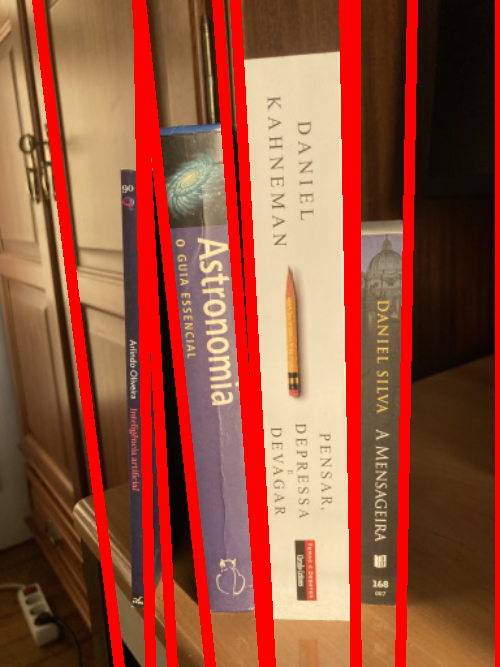

In [16]:
img = pil_image_to_opencv_image(pil_image)

final_image = resize_img(img)
final_points = detect_spines(final_image)

for point in final_points:
    ((x1, y1), (x2, y2)) = point
    final_image = cv2.line(final_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

pil_image_disp_w_lines = opencv_image_to_pil_image(final_image)

display(pil_image_disp_w_lines)

In [18]:
img = pil_image_to_opencv_image(pil_image)

final_image = resize_img(img)
final_points = detect_spines(final_image)

cropped_images = get_cropped_images(final_image, final_points)

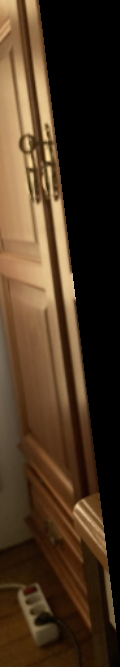

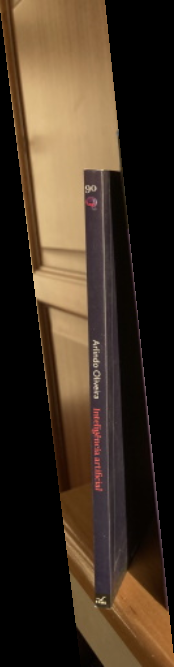

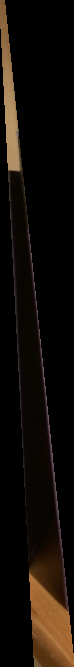

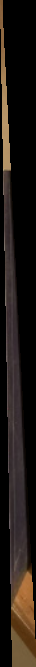

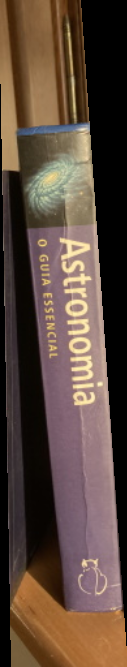

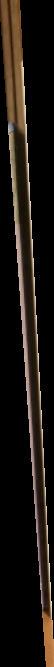

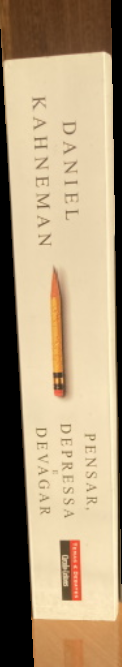

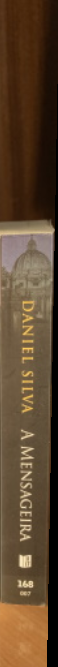

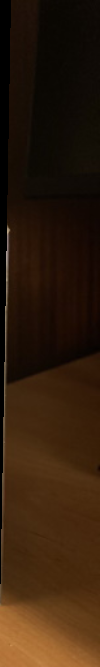

In [19]:
for img in cropped_images:
    pil_image = opencv_image_to_pil_image(img)
    display(pil_image)